In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 고장밀도함수(f(t))의 종류

1. 지수분포(시스템의 고장)

2. 와이블분포(일반적인 수명분포)

# 1. 지수분포

여러개의 부품이 조합되어 만들어진 기기나 시스템의 고장밀도함수. 

이때 고장률 $\lambda(t)$는 시간에 관계없이 일정 (= CFR; Constatnt Failure Rate)

$ f(t;\theta) = 1/\theta * e^{-t/\theta} : 0 <= t   , \lambda = 1/\theta$


In [17]:
def exp_f(t, theta):
    return (1/theta)*e**(-t/theta)

## 1.1 평균($\theta$)에 따른 분포 

(  $\theta = 0.5, 1, 2$ )

$f(t;0.5) = 2 * e^{-2t}$

$f(t;1) = e^{-t}$

$f(t;2) = 0.5 * e^{-0.5t}$

In [18]:
e = np.exp(1)
e

2.718281828459045

In [19]:
t_list = list(np.linspace(0,5,100))
t_list

[0.0,
 0.050505050505050504,
 0.10101010101010101,
 0.15151515151515152,
 0.20202020202020202,
 0.25252525252525254,
 0.30303030303030304,
 0.35353535353535354,
 0.40404040404040403,
 0.45454545454545453,
 0.5050505050505051,
 0.5555555555555556,
 0.6060606060606061,
 0.6565656565656566,
 0.7070707070707071,
 0.7575757575757576,
 0.8080808080808081,
 0.8585858585858586,
 0.9090909090909091,
 0.9595959595959596,
 1.0101010101010102,
 1.0606060606060606,
 1.1111111111111112,
 1.1616161616161615,
 1.2121212121212122,
 1.2626262626262625,
 1.3131313131313131,
 1.3636363636363635,
 1.4141414141414141,
 1.4646464646464645,
 1.5151515151515151,
 1.5656565656565655,
 1.6161616161616161,
 1.6666666666666667,
 1.7171717171717171,
 1.7676767676767677,
 1.8181818181818181,
 1.8686868686868687,
 1.9191919191919191,
 1.9696969696969697,
 2.0202020202020203,
 2.0707070707070705,
 2.121212121212121,
 2.1717171717171717,
 2.2222222222222223,
 2.2727272727272725,
 2.323232323232323,
 2.3737373737373737,

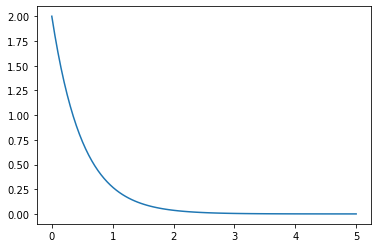

In [20]:
#theta 0.5인 지수분포
exp0_f_list = [exp_f(t,0.5) for t in t_list]
plt.plot(t_list, exp0_f_list)
plt.show()

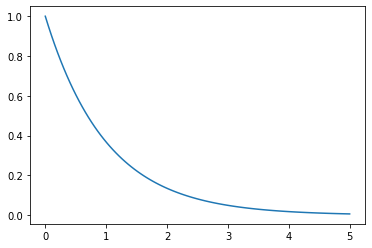

In [21]:
#theta 1인 지수분포
exp1_f_list = [exp_f(t,1) for t in t_list]
plt.plot(t_list, exp1_f_list)
plt.show()

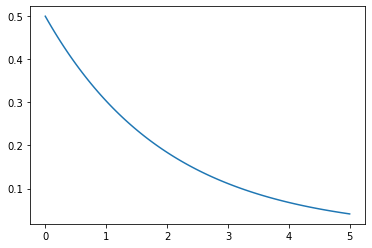

In [22]:
#theta 2인 지수분포
exp2_f_list = [exp_f(t,2) for t in t_list]
plt.plot(t_list, exp2_f_list)
plt.show()

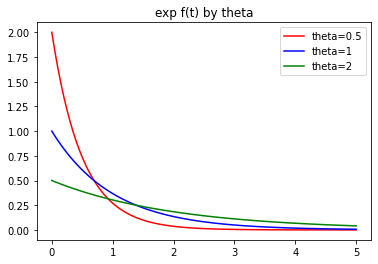

In [23]:
plt.plot(t_list, exp0_f_list, c='r', label='theta=0.5')
plt.plot(t_list, exp1_f_list, c='b', label='theta=1')
plt.plot(t_list, exp2_f_list, c='g', label='theta=2')

plt.title('exp f(t) by theta')
plt.legend()
plt.show()

## 1.2 평균($\theta$)에 따른 누적 분포 

(  $\theta = 0.5, 1, 2$ )

In [24]:
def exp_F(t,theta):
    return 1-e**(-(t/theta))

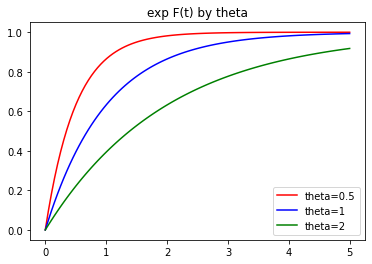

In [25]:
exp0_F_list = [exp_F(t,0.5) for t in t_list]
exp1_F_list = [exp_F(t,1) for t in t_list]
exp2_F_list = [exp_F(t,2) for t in t_list]

plt.plot(t_list, exp0_F_list, c='r', label='theta=0.5')
plt.plot(t_list, exp1_F_list, c='b', label='theta=1')
plt.plot(t_list, exp2_F_list, c='g', label='theta=2')

plt.title('exp F(t) by theta')
plt.legend()
plt.show()

## 1.3 예제

1. 어떤 제품이 평균고장률 0.001/시간인 지수분포를 따를때 이 제품의 수명분포를 그리시오(0~2000시간)

2. 이 제품을 500시간 사용하였을때 신뢰도는?

In [26]:
h = 0.001
theta = 1/h

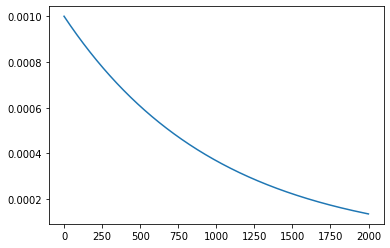

In [27]:
t_list = [t for t in range(2000)]
fail_list = [exp_f(t,theta) for t in t_list]

plt.plot(t_list, fail_list)
plt.show()

In [28]:
sol = 1 - exp_F(500, theta)
sol

0.6065306597126334

# 2. 와이블분포

신뢰성 분석에서 가장 널리 쓰이는 분포로 고장률이 어떻게 될지 모를때 사용

$f(t;\eta,\beta) = \beta/\eta * (t/\eta)^{\beta-1} * e^{-(t/\eta)^{\beta} }$

$\beta = 형상모수, \eta = 척도모수$

------


$\beta$ < 1 ; $\lambda (t)$는 DFR

$\beta$  = 1 ; $\lambda (t)$는 CFR이며, 지수분포에 대응

$\beta$  > 1 ; $\lambda (t)$는 IFR이며, 정규분포($\beta$=3.5 일때)에 대응

In [29]:
def weib_f(t, beta, eta):
    return (beta/eta) * (t/eta)**(beta-1) * np.exp(-(t/eta)**beta)

## 2.1 형상모수, 척도모수

($\beta,\eta$)에 따른 와이블 분포 

(  $\beta = 0.8, 1, 2$, $\eta = 1,2 $ )

In [30]:
t_list = list(np.linspace(0,5,100))

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


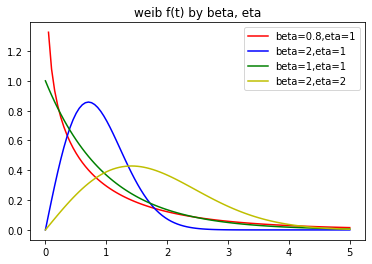

In [32]:
weib0_f_list = [weib_f(t,0.8,1) for t in t_list]
weib1_f_list = [weib_f(t,2,1) for t in t_list]
weib2_f_list = [weib_f(t,1,1) for t in t_list]
weib3_f_list = [weib_f(t,2,2) for t in t_list]

plt.plot(t_list, weib0_f_list, c='r', label='beta=0.8,eta=1')
plt.plot(t_list, weib1_f_list, c='b', label='beta=2,eta=1')
plt.plot(t_list, weib2_f_list, c='g', label='beta=1,eta=1')
plt.plot(t_list, weib3_f_list, c='y', label='beta=2,eta=2')

plt.title('weib f(t) by beta, eta')
plt.legend()
plt.show()

## 2.2 형상모수, 척도모수

($\beta,\eta$)에 따른 와이블 누적 분포 

(  $\beta = 0.8, 1, 2$, $\eta = 1,2 $ )

In [33]:
def weib_F(t,beta,eta):
    return 1 - np.exp(-(t/eta)**beta)

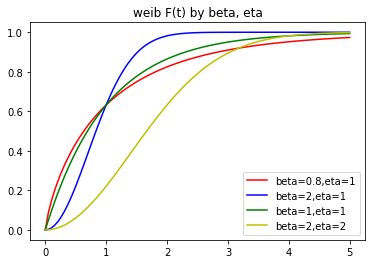

In [34]:
weib0_F_list = [weib_F(t,0.8,1) for t in t_list]
weib1_F_list = [weib_F(t,2,1) for t in t_list]
weib2_F_list = [weib_F(t,1,1) for t in t_list]
weib3_F_list = [weib_F(t,2,2) for t in t_list]

plt.plot(t_list, weib0_F_list, c='r', label='beta=0.8,eta=1')
plt.plot(t_list, weib1_F_list, c='b', label='beta=2,eta=1')
plt.plot(t_list, weib2_F_list, c='g', label='beta=1,eta=1')
plt.plot(t_list, weib3_F_list, c='y', label='beta=2,eta=2')

plt.title('weib F(t) by beta, eta')
plt.legend()
plt.show()

## 2.3 예제

1. 어떤제품의 수명분포는 형상모수가 2, 척도모수가 500시간인 와이블분포를 따른다. 

    이제품의 수명분포를 그리시오(0~1000시간)

2. 이제품의 고장누적확률 분포를 그리시오(0~1000시간)

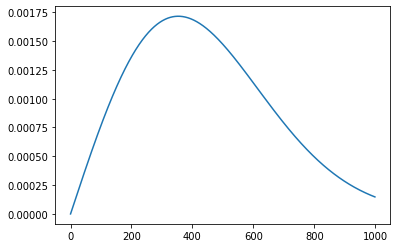

In [35]:
t_list = [t for t in range(1000)]
weib_f_list = [weib_f(t,2,500) for t in t_list]
plt.plot(t_list, weib_f_list)
plt.show()

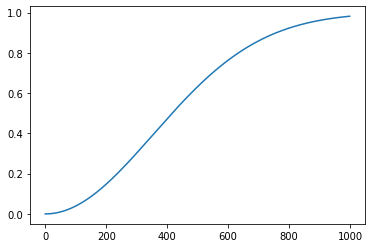

In [36]:
weib_F_list = [weib_F(t,2,500) for t in t_list]
plt.plot(t_list, weib_F_list)
plt.show()